<a href="https://colab.research.google.com/github/aldiidf/Project-Aldi/blob/main/ProjectDataAnalyst_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Course

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Clean Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/export?format=csv&gid=1903509374


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
df_cleanned = df.copy() #data dicopas
df_cleanned['Date'] = pd.to_datetime(df_cleanned['Date'])
df_cleanned['Revenue'] = df_cleanned['Unit price'] * df_cleanned['Quantity']
df_cleanned.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


In [ ]:
#cek typo manual
df_cleanned['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
#cek nama columns
df_cleanned.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity', 'Revenue'],
      dtype='object')

In [ ]:
#looping cek typo
for col_name in ['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type','Gender', 'Product line']:
       print(df_cleanned[col_name].value_counts(), '\n')

2019-02-07    20
2019-02-15    19
2019-03-14    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: Date, Length: 89, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health

In [ ]:
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'} #kelompok tp berpasangan 

df_replaced = df_cleanned.replace(dict_typo)
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#looping cek typo
for col_name in ['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type','Gender', 'Product line']:
       print(df_replaced[col_name].value_counts(), '\n')

2019-02-07    20
2019-02-15    19
2019-03-14    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: Date, Length: 89, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line

In [ ]:
#cek data duplicate
df_replaced['Invoice ID'].duplicated() #cek duplicate per baris

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Invoice ID, Length: 1000, dtype: bool

In [ ]:
#cek data duplicate
df_replaced['Invoice ID'].duplicated().sum() #kalo hasil lebih dr 0 berarti ada duplicate

0

# EDA & Visualization

In [ ]:
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


## Daily Trend Overall

In [ ]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Quantity', 'Revenue'].sum() #groupby = pivot di excel
agg_daily

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Quantity,Revenue
0,2019-01-01,81,4519.22
1,2019-01-02,48,1852.86
2,2019-01-03,37,1979.17
3,2019-01-04,32,1546.37
4,2019-01-05,55,3368.27
...,...,...,...
84,2019-03-26,52,1869.06
85,2019-03-27,45,2764.59
86,2019-03-28,48,2123.24
87,2019-03-29,54,3831.66


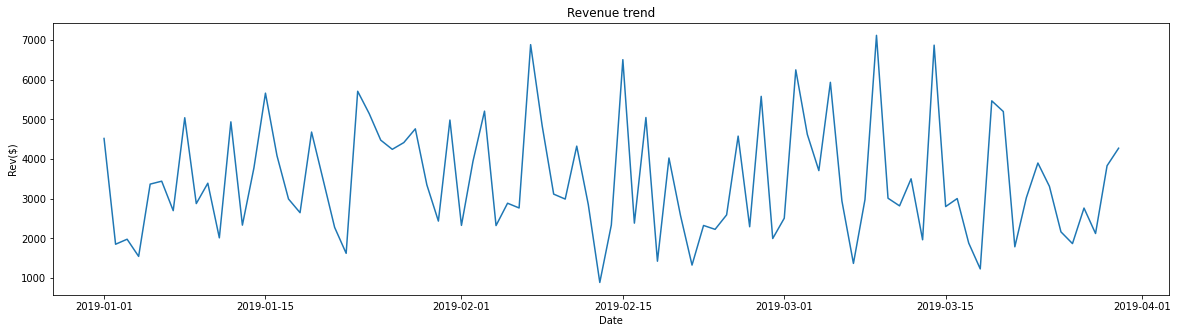

In [ ]:
#plot data dr agg daily
plt.rcParams['figure.figsize'] = (20,5)
plt.plot('Date','Revenue',data=agg_daily)
plt.title('Revenue trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

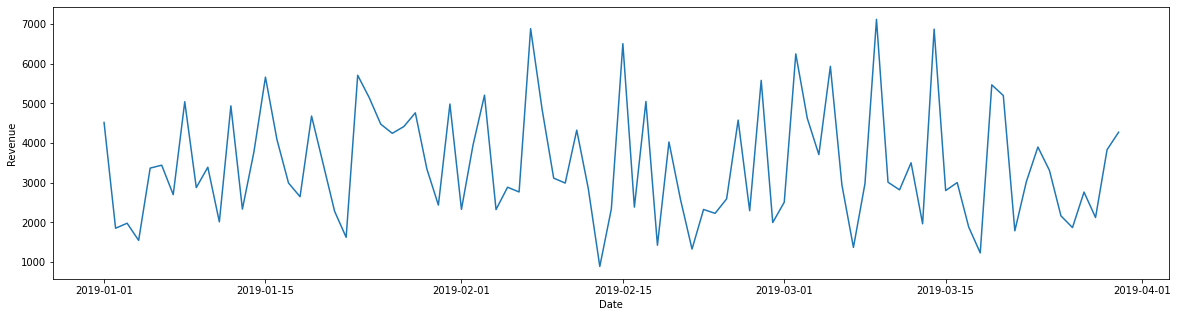

In [ ]:
sns.lineplot(data=agg_daily, x= 'Date', y = 'Revenue')

## By Payment

In [ ]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'}) #kalau satu baris ingin banyak aggregat
agg_payment

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


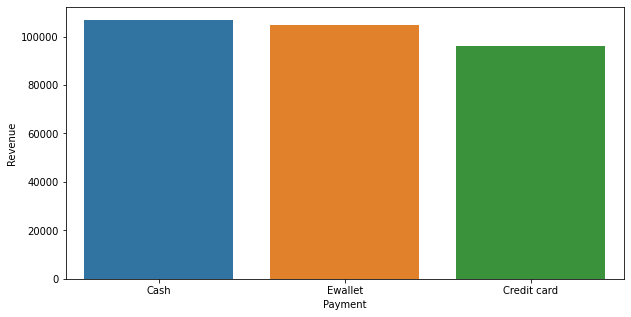

In [ ]:
#menggunakan bar plot untuk compare menggunakan seaborn
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot('Payment', 'Revenue', data=agg_payment.sort_values('Revenue', ascending=False))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


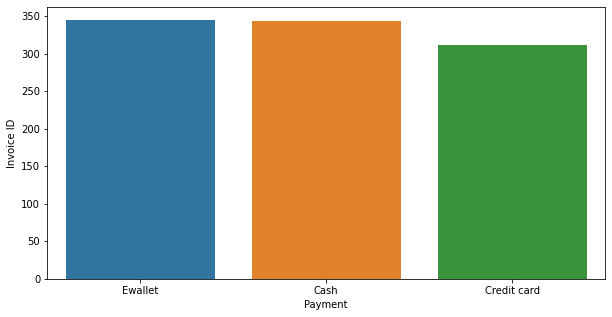

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot('Payment', 'Invoice ID', data=agg_payment.sort_values('Invoice ID', ascending=False))

([<matplotlib.patches.Wedge at 0x7f9ec301af50>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '35%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31%'),
  Text(0.288108634542965, -0.5263016385133037, '34%')])

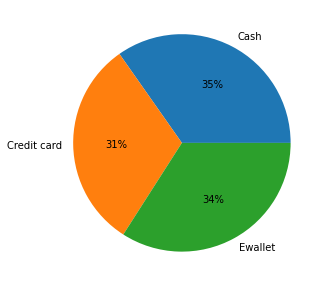

In [ ]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'],autopct='%.lf%%')

## By Gender & Product Type

In [ ]:
agg_gend = df_replaced.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gend

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79
5,Female,Sports and travel,88
6,Male,Electronic accessories,86
7,Male,Fashion accessories,82
8,Male,Food and beverages,84
9,Male,Health and beauty,88


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


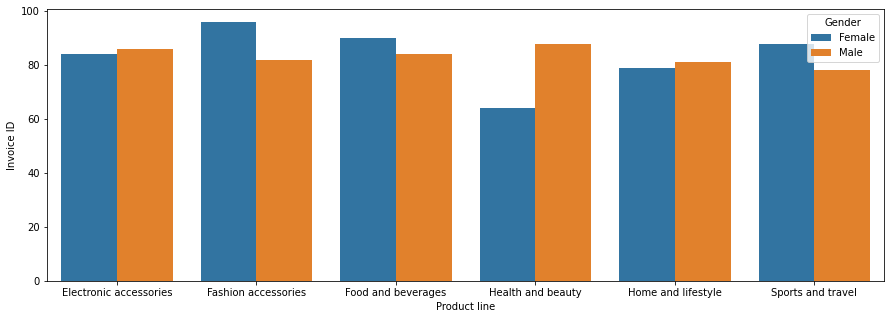

In [ ]:
#barplot agg gend
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot('Product line', 'Invoice ID', data=agg_gend, hue = 'Gender')